# Support Vector Regression (SVR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
y = y.reshape(-1,1)

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
y.shape

(10, 1)

### Feature Scaling

In [9]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVR to the dataset

In [11]:
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X, y)

/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Predicting a new result

In [12]:
y_pred = svr_reg.predict((np.array(6.5).reshape(-1,1)))

In [14]:
y_pred = svr_reg.predict(sc_X.transform(np.array(6.5).reshape(-1,1)))
y_pred = sc_y.inverse_transform(y_pred)

In [15]:
y_pred

array([170370.0204065])

### Visualising the SVR results

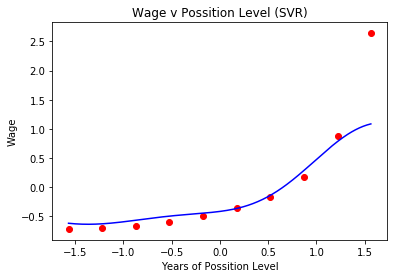

In [17]:
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, svr_reg.predict(X_grid), color = 'blue')
plt.title('Wage v Possition Level (SVR)')
plt.xlabel('Years of Possition Level')
plt.ylabel('Wage')
plt.show()